In [1]:
%run initlibs.py Lustre dark
from tools.loaders.data_loaders import load_data

# Indicator and some charts

In [2]:
d = load_data('amp:SPXM')

In [33]:
period = 22
mult = 3
x = d.ohlc('1d')

In [65]:
a = atr(x, period, smoother='ema')

hh = x.high.rolling(window=period).max()
ll = x.low.rolling(window=period).min()

rad_long = hh - a * mult
rad_short = ll + a * mult

brk_d = x[(x.close.shift(1) > rad_long.shift(1)) & (x.close < rad_long)].index
brk_u = x[(x.close.shift(1) < rad_short.shift(1)) & (x.close > rad_short)].index

sw = pd.Series(np.nan, x.index)
sw.loc[brk_d] = +1
sw.loc[brk_u] = -1
sw = sw.ffill()

radU = rad_short[sw[sw > 0].index]
radD = rad_long[sw[sw < 0].index]
rad = srows(radU, radD)

In [66]:
_z = slice('2019-01-05', '2021-01-11')

In [ ]:
fig(18, 8)
ohlc_plot(x[_z])
plt.plot(rad_long[_z], c='g')
plt.plot(rad_short[_z], c='r')

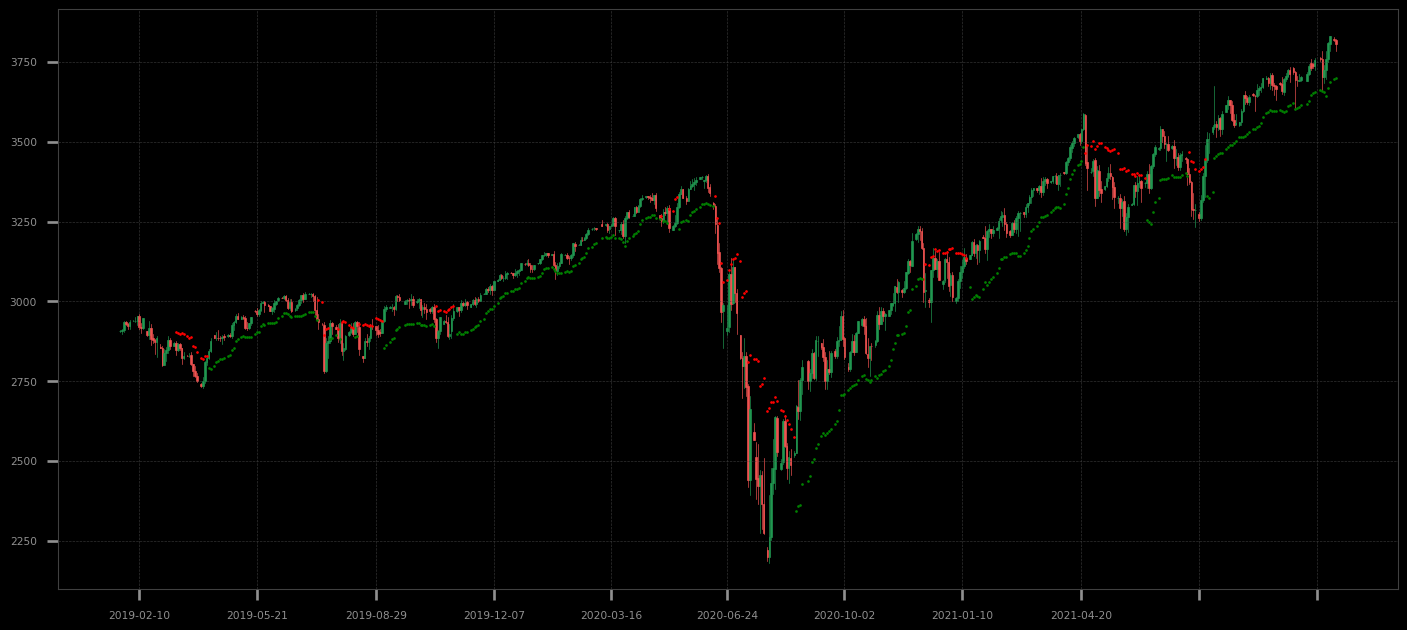

In [76]:
fig(18, 8)
ohlc_plot(x[_z])
# plt.plot(rad[_z])
plt.plot(radU[_z], '.', c='r', ms=2)
plt.plot(radD[_z], '.', c='g', ms=2)